In [ ]:
# https://colab.research.google.com/drive/1frKGhhGeYSlIIxfmbZOHyaO_AQxmBZzs?usp=sharing#scrollTo=kGLd3nEREA0M

**Building a ML Model for the Bankruptcy Dataset**
---
- Joemichael Alvarez
- Frank Rodriguez
- Michael Seman


Here is the link to our dataset:
https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

With this dataset, we will build a ML model that predict if a company will go bankrupt or not.

We will perform EDA, Data Cleaning, Model Building, Testing, and Tuning.

A machine learning project may not be linear, but it has a number of well known steps:



1.   Define Problem
2.   Prepare Data
3.   Evaluate Algorithms
4.   Improve Results
5.   Present Results




In [ ]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
pd.set_option('display.max_rows', None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


**Load The Data**
---
We are going to use the iris flowers dataset. This dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

```
# This is formatted as code
```




In [ ]:
# Imported and loaded additional libraries

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Loading the Dataset 

url = "https://github.com/AlvarezJoe/Datasets/raw/main/bankruptcy_data.csv"
df = read_csv(url)

**Summarize the Dataset**
---
Now it is time to take a look at the data. In this step we are going to take a look at the data a few different ways:



1.   Dimensions of the dataset.
2.   Peek at the data itself.
3.   Statistical summary of all attributes.
4.   Breakdown of the data by the class variable.

Don’t worry, each look at the data is one command. These are useful
commands that you can use again and again on future projects.

Dimensions of Dataset
---
We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [ ]:
# The function below shows the dimensions of our dataset: 6819 rows and 96 different columns

df.shape

(6819, 96)

In [ ]:
df.shape

(6819, 96)

In [ ]:
# The head function gets the first n many rows and in the case below, I just wanted the first 2 rows so n = 2, just trying to take a peek into the data

df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.

Statistical Summary
---
Now we can take a look at a summary of each attribute.This includes the count, mean, the min and max values as well as some percentiles.

In [ ]:
# Statistical description of each column/variable

df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

Class Distribution
---
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [ ]:
# The code below shows the amount of businesses (220) that went bankrupt and those that did not (6599), so like in most cases we have an imbalanced dataset
print(df.groupby('Bankrupt?').size())


Bankrupt?
0    6599
1     220
dtype: int64


# Additional Data Inspection & Cleaning

# Data inspection

In [ ]:
# Looking at the datatypes for each column in the dataframe to see if there are any categorical ones hiding as a numeric column
# Also checking at the same time if there are any null values in any of the columns, which after a review there does not seem to be

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.dtypes.value_counts()


float64    93
int64       3
dtype: int64

In [ ]:
# Now checking to see how many unique values are in each column

df.nunique()

Bankrupt?                                                      2
 ROA(C) before interest and depreciation before interest    3333
 ROA(A) before interest and % after tax                     3151
 ROA(B) before interest and depreciation after tax          3160
 Operating Gross Margin                                     3781
 Realized Sales Gross Margin                                3788
 Operating Profit Rate                                      3376
 Pre-tax net Interest Rate                                  3789
 After-tax net Interest Rate                                3604
 Non-industry income and expenditure/revenue                2551
 Continuous interest rate (after tax)                       3617
 Operating Expense Rate                                     2966
 Research and development expense rate                      1536
 Cash flow rate                                             5557
 Interest-bearing debt interest rate                        1080
 Tax rate (A)            

# Data Cleaning

In [ ]:
# Realized that the Bankruptcy column is missing a space in the beginning the rest of the columns have and so I am using the strip method to remove any whitespace before and after the string of words in each column header

df.columns = df.columns.str.strip()

In [ ]:
# Dropping the Net Income Flag because only has one unique value which is useless in any kind of model and moving the 'Liability-Assets Flag' column as it looks like a categorical variable disguised as numeric/continuous variable with only 2 unique values
#netInCol = df['Net Income Flag']
df.drop(labels=['Net Income Flag'], axis=1, inplace = True)
#df.insert(len(df.columns),'Net Income Flag', netInCol)

LAFlag = df['Liability-Assets Flag']
df.drop(labels=['Liability-Assets Flag'], axis=1, inplace = True)
df.insert(len(df.columns),'Liability-Assets Flag', LAFlag)

In [ ]:
# On a recomendation from Dr Lee, with 96 different columns I decided to create a dictionary of the column names indexed by numbers. 
# I will now replace the current column names in the dataset, to use the column indexes more effeciently and also not lose the context of what each column means

columnIndexDict = {}
colNum = 0

for col in df.columns: 
  columnIndexDict[colNum] = col
  colNum += 1

columnIndexDict

{0: 'Bankrupt?',
 1: 'ROA(C) before interest and depreciation before interest',
 2: 'ROA(A) before interest and % after tax',
 3: 'ROA(B) before interest and depreciation after tax',
 4: 'Operating Gross Margin',
 5: 'Realized Sales Gross Margin',
 6: 'Operating Profit Rate',
 7: 'Pre-tax net Interest Rate',
 8: 'After-tax net Interest Rate',
 9: 'Non-industry income and expenditure/revenue',
 10: 'Continuous interest rate (after tax)',
 11: 'Operating Expense Rate',
 12: 'Research and development expense rate',
 13: 'Cash flow rate',
 14: 'Interest-bearing debt interest rate',
 15: 'Tax rate (A)',
 16: 'Net Value Per Share (B)',
 17: 'Net Value Per Share (A)',
 18: 'Net Value Per Share (C)',
 19: 'Persistent EPS in the Last Four Seasons',
 20: 'Cash Flow Per Share',
 21: 'Revenue Per Share (Yuan ¥)',
 22: 'Operating Profit Per Share (Yuan ¥)',
 23: 'Per Share Net profit before tax (Yuan ¥)',
 24: 'Realized Sales Gross Profit Growth Rate',
 25: 'Operating Profit Growth Rate',
 26: 'Aft

In [ ]:
# Changing the column names into numbers to work with them more easily
i = 0

for col in df:
  
  if columnIndexDict[i] == col:
    df.rename(columns = {col:i}, inplace = True)
    i += 1

In [ ]:
# Just to confirm that the change worked

df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,0
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,0.001384,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,0


In [ ]:
df[0].value_counts()

0    6599
1     220
Name: 0, dtype: int64

In [ ]:
df_X = df.loc[:, 1:len(df)]
df_y = df.loc[:,0]

df_X.head(1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.14795,0.14795,0.14795,0.169141,0.311664,0.01756,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.2631,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,0.000182,0.000117,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.27692,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,701000000.0,6.550000e+09,0.593831,458000000.0,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.11825,0.716845,0.009219,0.622879,0.601453,0.82789,0.290202,0.026601,0.56405,0.016469,0


# Basic Visualizations

## Univariate Plots

We are going to visualize our first four columns to just get a better idea of the data we are working with.

**First, let's see some histograms to see how our values are distributed.**


<Figure size 144x144 with 0 Axes>

Text(0.5, 1.0, 'ROA(C) before interest and depreciation before interest')

<Figure size 144x144 with 0 Axes>

Text(0.5, 1.0, 'ROA(A) before interest and % after tax')

<Figure size 144x144 with 0 Axes>

Text(0.5, 1.0, 'ROA(B) before interest and depreciation after tax')

<Figure size 144x144 with 0 Axes>

Text(0.5, 1.0, 'Operating Gross Margin')

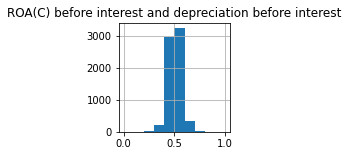

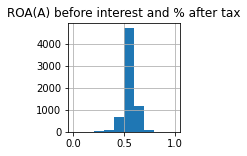

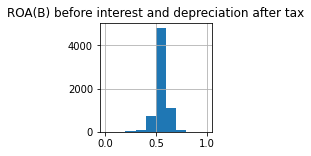

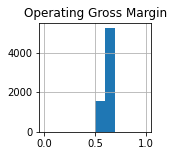

In [ ]:
for i in range(1,5):
  plt.figure(figsize =(2, 2))
  df[i].hist()
  title = columnIndexDict[i]
  plt.title(title)
plt.show()

**Now let's do some box plots.**

<Figure size 216x216 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48e08bbc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48e0abad90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48e2fc22e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48e07d05e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48dfef5520>],
 'means': []}

Text(0.5, 1.0, 'ROA(C) before interest and depreciation before interest')

<Figure size 216x216 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48df871f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48df8711f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48df871460>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48df7aff40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48df7af550>],
 'means': []}

Text(0.5, 1.0, 'ROA(A) before interest and % after tax')

<Figure size 216x216 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48df8d3fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48df8d3400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48df8d3ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48dfa015e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48dfa015b0>],
 'means': []}

Text(0.5, 1.0, 'ROA(B) before interest and depreciation after tax')

<Figure size 216x216 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48df9e4e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48df9e4100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48df9e41f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48dfa29160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48df9da9a0>],
 'means': []}

Text(0.5, 1.0, 'Operating Gross Margin')

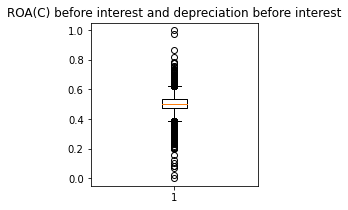

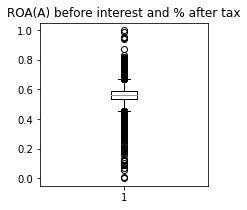

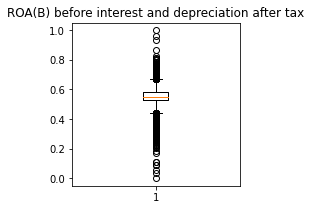

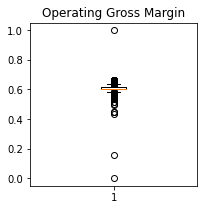

In [ ]:
for i in range(1,5):
  plt.figure(figsize =(3, 3))
  plt.boxplot( df[i])
  title = columnIndexDict[i]
  plt.title(title)
plt.show()

**Let's look at our next 4 columns as histograms grouped together**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48e0056280>,
      dtype=object)

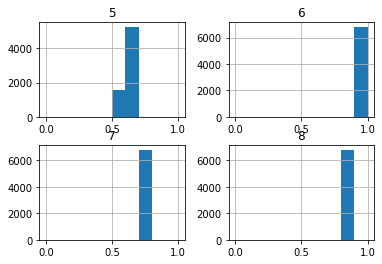

In [ ]:
data = df.iloc[:,5:9]
data.hist()
pyplot.show()
# we are checking for a normal distribition here.  The first 3 seems great, we might need to look into column 4.

In [ ]:
# double checking to make sure these columns don't contain the same values
df.iloc[:,5:9].nunique()

5    3788
6    3376
7    3789
8    3604
dtype: int64

Multivariate Plots
---
Now we can look at the interactions between the variables. First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48e00eb910>,
      dtype=object)

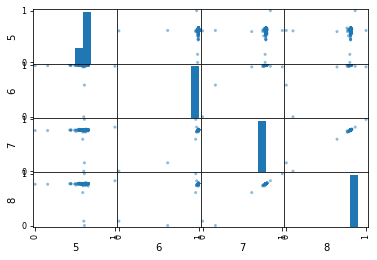

In [ ]:
# scatter plot matrix
scatter_matrix(data)
pyplot.show()
#Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

## Correlations

<Figure size 1440x1440 with 0 Axes>

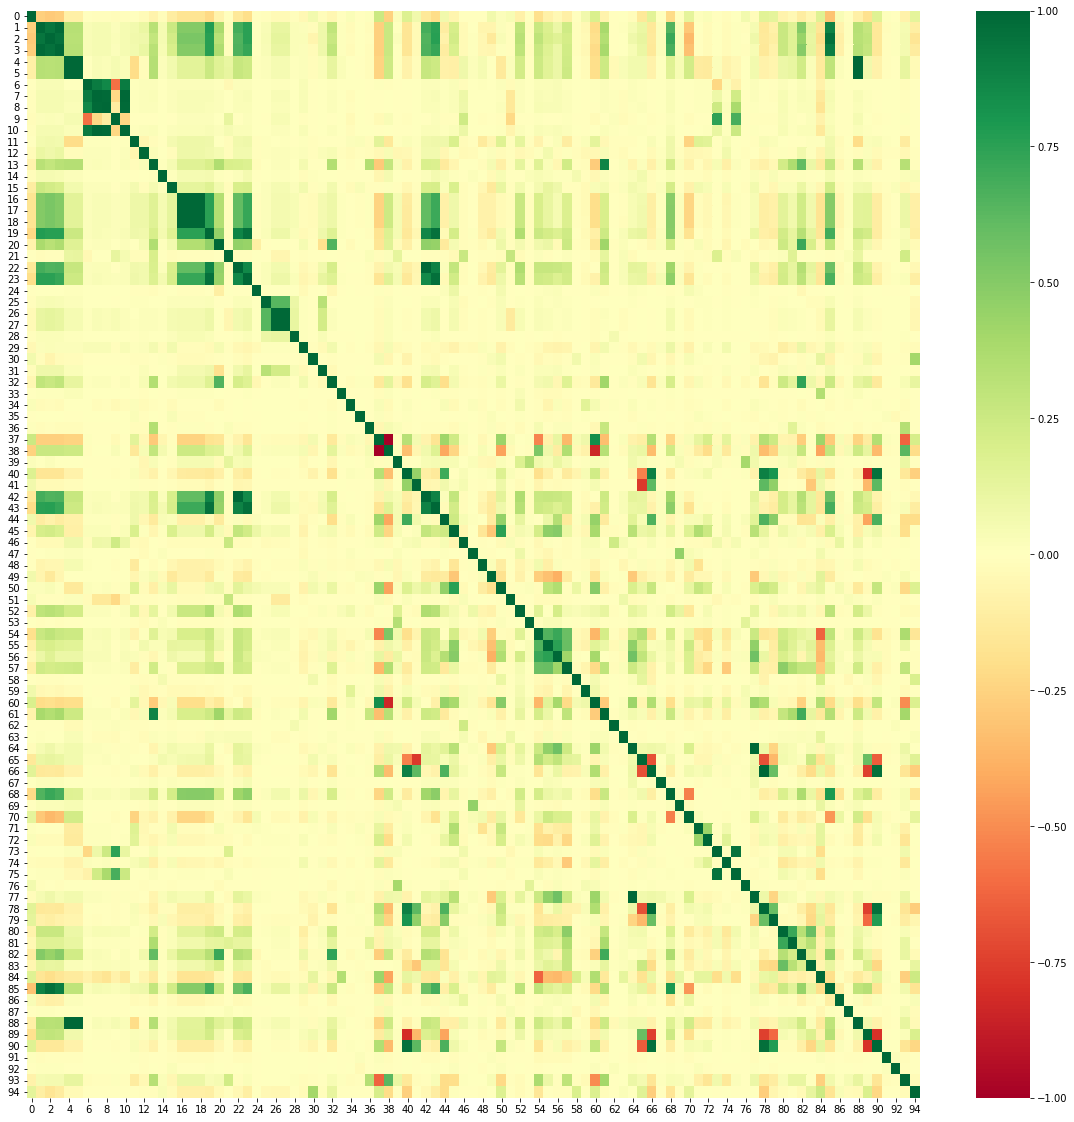

In [ ]:
# Not the easiest to read, but for fun lets make a heat map of ALL the correlations for our dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=False, cmap='RdYlGn')

<Figure size 360x1440 with 0 Axes>

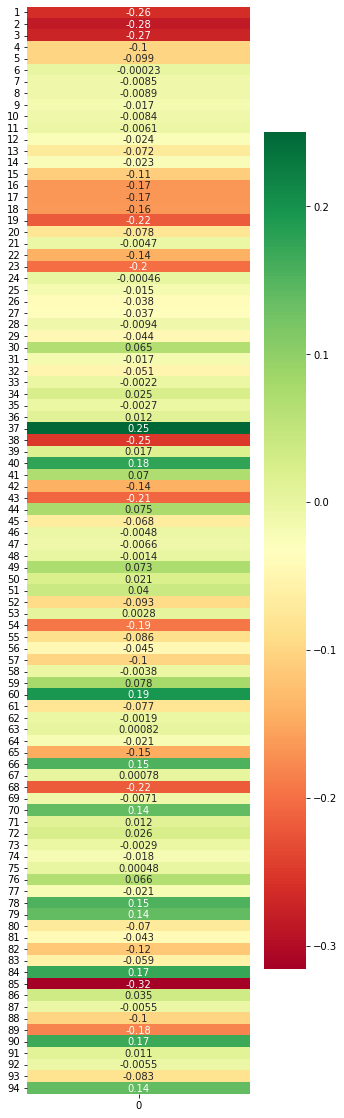

In [ ]:
# now lets focus on the only important column's correlation, our target variable (Bankrupt) with our features
plt.figure(figsize=(5,20))
x = corrmat[[0]]
x = x.iloc[1:,:]
sns.heatmap(x, annot=True,cmap='RdYlGn')

In [ ]:
# now lets look at the top 10 highest and lowest correlations.
x = x.sort_values(by=[0])
print("Top 10 Negative Correlations: ", x[0:10])
print("Top 10 Positive Correlations: ",x[len(x)-10:])


Top 10 Negative Correlations:             0
85 -0.315457
2  -0.282941
3  -0.273051
1  -0.260807
38 -0.250161
19 -0.219560
68 -0.217779
43 -0.207857
23 -0.201395
54 -0.193083
Top 10 Positive Correlations:             0
79  0.139014
70  0.139049
94  0.139212
78  0.153828
66  0.153828
90  0.166812
84  0.171306
40  0.176543
60  0.194494
37  0.250161


# Creating a model



## Splitting the Data
A simple 80/20 split.

In [ ]:
# Split-out validation dataset
X_trainh, X_validationh, Y_trainh, Y_validationh = train_test_split(df_X, df_y, test_size=0.20, random_state=1)

## Harness

We are going to send our data through a harness to test the Accuracy of 8 different algorithms:
1.   Logistic Regression (LR).
2.   Linear Discriminant Analysis (LDA).
3.   K-Nearest Neighbors (KNN). 
4.   Classification and Regression Trees (CART).
5.   Gaussian Naive Bayes (NB).
6.   Support Vector Machine (SVM).
7.   XGBoost (XGB).
8.   Random Forest (RFC).


In [ ]:
# was thinking of using catboost, but in the end it just takes too long
!pip install catboost
from catboost import CatBoostClassifier
# models.append(('CAT', CatBoostClassifier(verbose=0, boosting_type='Plain',leaf_estimation_iterations=1)))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating Models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))
models.append(('RFC', RandomForestClassifier()))


# evaluate each model based on accuracy score using stratified kfold
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_trainh, Y_trainh, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f accuracy ' % (name, cv_results.mean()))
	# print('%s: %f accuracy (%f) std' % (name, cv_results.mean(), cv_results.std()))
 
 

LR: 0.966453 accuracy 
LDA: 0.963701 accuracy 
KNN: 0.967187 accuracy 
CART: 0.953804 accuracy 
NB: 0.061229 accuracy 
SVM: 0.968836 accuracy 
XGB: 0.969935 accuracy 
RFC: 0.970669 accuracy 


Select Best Model
---
Above we have the accuracy scores for our 8 models.  Let's visualize them so we can inform our selection for the best model.

<Figure size 432x360 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48df025f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48df02f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48df025be0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f48df02fd00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f48df036040>,
 'means': []}

Text(0.5, 1.0, 'Algorithm Comparison')

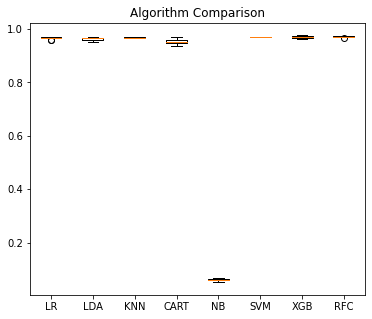

In [ ]:
# Compare Accuracies with Box plots
pyplot.figure(figsize=(6,5))
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()
# This isn't the best visualization.  We can clearly see the NB (Naive Bayes) is the worst
# maybe if we remove it, we can see the rest better

In [ ]:
# removing NB from the results and labels
results2, names2 = results, names
results2.pop(4)
names2.pop(4)

array([0.05128205, 0.06043956, 0.06043956, 0.06227106, 0.06593407,
       0.05321101, 0.06788991, 0.06788991, 0.0587156 , 0.06422018])

'NB'

<Figure size 432x360 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48def71fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48def816a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48def71c40>,
 'medians': [<matplotlib.lines.Line2D at 0x7f48def81d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f48def8c0a0>,
 'means': []}

Text(0.5, 1.0, 'Algorithm Accuracy')

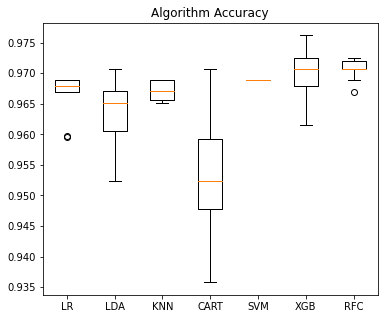

In [ ]:
# Compare Algorithms again minus NB
pyplot.figure(figsize=(6,5))
pyplot.boxplot(results2, labels=names2)
pyplot.title('Algorithm Accuracy')
pyplot.show()
# Now we can see our top performing models much better 

**Make Predictions**
---
Let's look at SVM, RFC, and XGB and see how well they make predictions (our most accurate models).

In [ ]:
# fitting model SVC
model = SVC(gamma='auto')
model.fit(X_trainh, Y_trainh)
predictions = model.predict(X_validationh)

SVC(gamma='auto')

In [ ]:
# fitting model rfc
model_rfc = RandomForestClassifier()
model_rfc.fit(X_trainh, Y_trainh)
predictions_rfc = model_rfc.predict(X_validationh)

RandomForestClassifier()

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_trainh, Y_trainh)
predictions_xgb = xgb_clf.predict(X_validationh)

XGBClassifier()

Evaluate Predictions
---
Let's look at our confusion matrices and classification reports for our selected models and evaluate how our models did at predicting.

In [ ]:
# Evaluate predictions for Support Vector Machine
print(confusion_matrix(Y_validationh, predictions))
print(classification_report(Y_validationh, predictions))

[[1314    0]
 [  50    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.95      1364



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluate predictions for Random Forest
print(confusion_matrix(Y_validationh, predictions_rfc))
print(classification_report(Y_validationh, predictions_rfc))

[[1310    4]
 [  42    8]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1314
           1       0.67      0.16      0.26        50

    accuracy                           0.97      1364
   macro avg       0.82      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364



In [ ]:
# Evaluate predictions for XGBoost
print(confusion_matrix(Y_validationh, predictions_xgb))
print(classification_report(Y_validationh, predictions_xgb))

[[1312    2]
 [  39   11]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1314
           1       0.85      0.22      0.35        50

    accuracy                           0.97      1364
   macro avg       0.91      0.61      0.67      1364
weighted avg       0.97      0.97      0.96      1364



In [ ]:
Y_validationh.value_counts(normalize=True)

0    0.963343
1    0.036657
Name: 0, dtype: float64

### Initial Observations:
Looking at models solely based on accuracy can be misleading.  The most important part of our model is correctly classifying the Yes class.  The data is very imbalanced, so it's easy to be accurate.  If you simply predicted the majority class (No), your accuracy would be 96%.  Only XGBoost and Random Forest outperform that.

## Harness 2 (with Recall of Yes class as metric)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
recall_scorer = make_scorer(recall_score, pos_label=1)

In [ ]:
results2 = []
names2 = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_trainh, Y_trainh, cv=kfold, scoring=recall_scorer)
	results2.append(cv_results)
	names2.append(name)
	# print('%s: %f recall ' % (name, cv_results.mean()))
	print('%s: %f recall (%f) std' % (name, cv_results.mean(), cv_results.std()))

LR: 0.000000 recall (0.000000) std
LDA: 0.288235 recall (0.071803) std
KNN: 0.011765 recall (0.023529) std
CART: 0.305882 recall (0.104567) std
NB: 0.964706 recall (0.039019) std
SVM: 0.000000 recall (0.000000) std
XGB: 0.241176 recall (0.092822) std
RFC: 0.182353 recall (0.066811) std


<Figure size 432x360 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48dee83460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48dee83b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48dee83100>,
 'medians': [<matplotlib.lines.Line2D at 0x7f48dee8f220>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f48dee8f520>,
 'means': []}

Text(0.5, 1.0, 'Algorithm Recall-Yes Comparison')

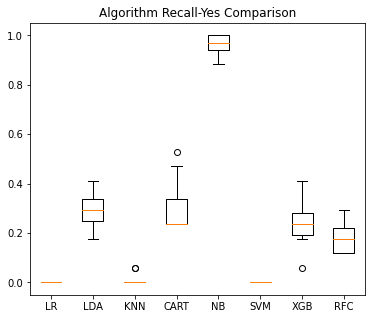

In [ ]:
# Compare Algorithms with Box plots
pyplot.figure(figsize=(6,5))
pyplot.boxplot(results2, labels=names2)
pyplot.title('Algorithm Recall-Yes Comparison')
pyplot.show()

In [ ]:
modelNB = GaussianNB()
modelNB.fit(X_trainh, Y_trainh)
predictions_NB = modelNB.predict(X_validationh)

GaussianNB()

In [ ]:
# Evaluate predictions for NB
print(confusion_matrix(Y_validationh, predictions_NB))
print(classification_report(Y_validationh, predictions_NB))

[[  50 1264]
 [   2   48]]
              precision    recall  f1-score   support

           0       0.96      0.04      0.07      1314
           1       0.04      0.96      0.07        50

    accuracy                           0.07      1364
   macro avg       0.50      0.50      0.07      1364
weighted avg       0.93      0.07      0.07      1364



## Most Important Features

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

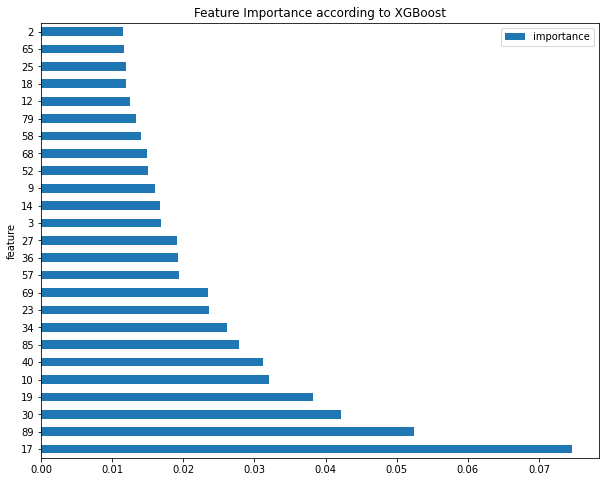

In [ ]:
df_features = feature_imp(df_X, xgb_clf)[:25]
df_features.set_index('feature', inplace=True)
df_features.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

In [ ]:
df_features.index

Int64Index([17, 89, 30, 19, 10, 40, 85, 34, 23, 69, 57, 36, 27,  3, 14,  9, 52,
            68, 58, 79, 12, 18, 25, 65,  2],
           dtype='int64', name='feature')

In [ ]:
# saving the top 25 features in a dataframe in case we need to use them later
df_top25 = df[df_features.index]
df_top25.head()

,17,89,30,19,10,40,85,34,23,69,57,36,27,3,14,9,52,68,58,79,12,18,25,65,2
0,0.147950,0.827890,0.000327,0.169141,0.780985,0.390284,0.716845,0.001208,0.138736,0.002022,0.004094,0.021266,0.688979,0.405750,0.000725,0.302646,0.392913,0.903225,0.001997,0.126549,0.0,0.147950,0.848195,0.721275,0.424389
1,0.182251,0.839969,0.000443,0.208944,0.781506,0.376760,0.795297,0.004039,0.169918,0.002226,0.014948,0.012502,0.689702,0.516730,0.000647,0.303556,0.391590,0.931065,0.004136,0.120916,0.0,0.182251,0.848088,0.731975,0.538214
2,0.177911,0.836774,0.000396,0.180581,0.780284,0.379093,0.774670,0.005348,0.142803,0.002060,0.000991,0.021248,0.689470,0.472295,0.000790,0.302035,0.381968,0.909903,0.006302,0.117922,25500000.0,0.193713,0.848094,0.742729,0.499019
3,0.154187,0.834697,0.000382,0.193722,0.781241,0.379743,0.739555,0.002896,0.148603,0.001831,0.018851,0.009572,0.689110,0.457733,0.000449,0.303350,0.378497,0.906902,0.002961,0.120760,0.0,0.154187,0.848005,0.729825,0.451265
4,0.167502,0.839973,0.000439,0.212537,0.781550,0.375025,0.795016,0.003727,0.168412,0.002224,0.014161,0.005150,0.689697,0.522298,0.000686,0.303475,0.394371,0.913850,0.004275,0.110933,0.0,0.167502,0.848258,0.732000,0.538432


Final Observations
---

- A Dummy Model would predict at 96.3% accuracy.
- Most of our models performed at this level, meaning they would be just as accurate simply predicted the majority class (No) every time.
- After pulling the classification reports and confusion matrix, we can see that accuracy is not the most meaningful stat for this dataset.
- We compared recall scores, and our worst performing model in accuracy had the best recall (Naive Bayes).
- Unfortunately NB essentially predicted the minority class every time, resulting in a very low recall for the no class, and low precision for the yes class.
- For accuracy, the models that most deserve further analysis are Support Vector Machine, XGBoost, and Random Forest Classifier.
- For recall, the models that most deserve further analysis are Linear Discriminate Analysis, Decision Tree, and XGBoost.
- XGBoost specifically will be explored later as it appears in both lists.

# A Deep Dive - XGBoost
## Dealing with Imbalanced Data

In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.20, random_state=1,stratify=df_y)

## Baseline

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
pred =xgb.predict(X_test)

### Results:

In [ ]:
confusion_matrix (y_test, pred)

array([[1317,    3],
       [  35,    9]])

In [ ]:
print (classification_report (y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.75      0.20      0.32        44

    accuracy                           0.97      1364
   macro avg       0.86      0.60      0.65      1364
weighted avg       0.97      0.97      0.96      1364



## Under Sampling

In [ ]:
# combining data for ease of use
trainData = pd.concat([X_train,y_train],axis=1)
# finding indexes where bankrupt = 1 (yes)
ind = trainData[trainData[0]==1].index
# finding indexes of majority class
ind1 = trainData[trainData[0]==0].index
# separating minority class
minData = trainData.loc[ind]
# separating majority class
majData = trainData.loc[ind1]
# Take a random sample equal to length of the minority class to make the data set balanced
majSample = majData.sample(n=len(ind),random_state = 123)

In [ ]:
trainData[0].value_counts()

0    5279
1     176
Name: 0, dtype: int64

In [ ]:
balData = pd.concat([minData,majSample],axis = 0)
print('balanced data set shape',balData.shape)

balanced data set shape (352, 95)


In [ ]:
# Shuffling the data set
from sklearn.utils import shuffle
balData = shuffle(balData)

In [ ]:
# Making the new X_train and y_train
X_trainNew = balData.iloc[:,:-1]
y_trainNew = balData[0]


In [ ]:
# Defining New Model
xgb_us = XGBClassifier()
xgb_us.fit(X_trainNew, y_trainNew)

XGBClassifier()

In [ ]:
y_pred2 = xgb_us.predict(X_test)

### Results:

In [ ]:
confusion_matrix (y_test, y_pred2)

array([[1132,  188],
       [   5,   39]])

In [ ]:
print (classification_report (y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1320
           1       0.17      0.89      0.29        44

    accuracy                           0.86      1364
   macro avg       0.58      0.87      0.60      1364
weighted avg       0.97      0.86      0.90      1364



## Over Sampling

In [ ]:
!pip install smote-variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 407 kB 5.9 MB/s 
     |████████████████████████████████| 64 kB 4.1 MB/s 
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=3b1f57a6776a061f3693ad112e8c23b14792d07fae1401be5989a3c271fc7c95
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7453 sha256=83e3e1aafe16fff600afeb595849b0123925d932af22d6956e210bb6a33b5c6f
  Stored in directory: /root/.cache/pip/wheels/36/4b/c7/6af97584669b756c0d60c5ff05d5fb1f533a4e4d96e5ee92b9
Successfully built minisom statistics


In [ ]:
print("Before OverSampling count of yes: {}".format(sum(y_train==1)))
print("Before OverSampling count of no: {} \n".format(sum(y_train==0)))

Before OverSampling count of yes: 176
Before OverSampling count of no: 5279 



In [ ]:
import smote_variants as sv

# Instantiating the SMOTE class
oversampler= sv.SMOTE()

# Creating new training set

X_train_us, y_train_us = oversampler.sample(np.array(X_train), np.array(y_train))

# Shape after oversampling

print('After OverSampling, the shape of train_X: {}'.format(X_train_us.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_us.shape))

print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_us==1)))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_us==0)))

2022-12-02 21:49:16,262:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2022-12-02 21:49:16,269:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-12-02 21:49:16,275:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-12-02 21:49:16,288:INFO:SMOTE: simplex sampl

After OverSampling, the shape of train_X: (10558, 94)
After OverSampling, the shape of train_y: (10558,) 

After OverSampling, counts of label 'Yes': 5279
After OverSampling, counts of label 'no': 5279


In [ ]:
# Defining New Model
xgb_os = XGBClassifier()
xgb_os.fit(X_train_us, y_train_us)

XGBClassifier()

In [ ]:
y_pred3 = xgb_os.predict(np.array(X_test))

### Results:

In [ ]:
confusion_matrix(y_test, y_pred3)

array([[1273,   47],
       [  19,   25]])

In [ ]:
print (classification_report (y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.35      0.57      0.43        44

    accuracy                           0.95      1364
   macro avg       0.67      0.77      0.70      1364
weighted avg       0.96      0.95      0.96      1364



## MSMOTE

In [ ]:
# Instantiating the SMOTE class
oversampler= sv.MSMOTE()
# Creating new training sts
X_train_ms, y_train_ms = oversampler.sample(np.array(X_train), np.array(y_train))

2022-12-02 21:50:32,293:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
INFO:smote_variants:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-12-02 21:50:32,302:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-12-02 21:50:32,307:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski


In [ ]:
# Shape after MSMOTE
print('After MSMOTE, the shape of train_X: {}'.format(X_train_ms.shape))
print('After MSMOTE, the shape of train_y: {} \n'.format(y_train_ms.shape))

After MSMOTE, the shape of train_X: (10558, 94)
After MSMOTE, the shape of train_y: (10558,) 



In [ ]:
xgb_ms =  XGBClassifier()
xgb_ms.fit(X_train_ms, y_train_ms)

XGBClassifier()

In [ ]:
y_pred4 = xgb_ms.predict(np.array(X_test))

### Results:

In [ ]:
confusion_matrix(y_test, y_pred4)

array([[1297,   23],
       [  27,   17]])

In [ ]:
print (classification_report (y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.42      0.39      0.40        44

    accuracy                           0.96      1364
   macro avg       0.70      0.68      0.69      1364
weighted avg       0.96      0.96      0.96      1364



## Thoughts:
We are going to tune this model even further.  Our goal is to get the highest recall for our yes class as possible, without sacrificing too much precision.  It looks like using the undersampled training set is the way to do this.

## Tuning (Baseline)
With the undersampled training data, we set the parameters to commonly used values to be a baseline.  We will tune as many as possible.

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=4,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


In [ ]:
xgb1.fit(X_trainNew, y_trainNew)

XGBClassifier(colsample_bytree=0.8, max_depth=4, n_estimators=500, nthread=4,
              seed=27, subsample=0.8)

In [ ]:
y_pred_x1 = xgb1.predict(X_test)

### Results:

In [ ]:
confusion_matrix(y_test, y_pred_x1)

array([[1124,  196],
       [   6,   38]])

In [ ]:
print (classification_report (y_test, y_pred_x1))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1320
           1       0.16      0.86      0.27        44

    accuracy                           0.85      1364
   macro avg       0.58      0.86      0.60      1364
weighted avg       0.97      0.85      0.90      1364



## Tuning (maxdepth and minchildweight)

In [ ]:
from sklearn.metrics import f1_score
f1_scorer = make_scorer(f1_score, pos_label=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_test2 = {
 'max_depth':[1,2,3,4,5],
 'min_child_weight':[1,2,3,4,5]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=500, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring=recall_scorer,n_jobs=4,cv=5)

In [ ]:
gsearch2.fit(X_trainNew,y_trainNew)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     min_child_weight=2, n_estimators=500,
                                     nthread=4, seed=27, subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3, 4, 5]},
             scoring=make_scorer(recall_score, pos_label=1))

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 4, 'min_child_weight': 1}, 0.8979365079365079)

In [ ]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=4,
 min_child_weight=4,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
xgb2.fit(X_trainNew, y_trainNew)

XGBClassifier(colsample_bytree=0.8, max_depth=4, min_child_weight=4,
              n_estimators=500, nthread=4, seed=27, subsample=0.8)

In [ ]:
y_pred_x2 = xgb2.predict(X_test)

### Results:

In [ ]:
confusion_matrix(y_test, y_pred_x2)

array([[1114,  206],
       [   6,   38]])

In [ ]:
print (classification_report (y_test, y_pred_x2))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1320
           1       0.16      0.86      0.26        44

    accuracy                           0.84      1364
   macro avg       0.58      0.85      0.59      1364
weighted avg       0.97      0.84      0.89      1364



## Tuning (Gamma)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

In [ ]:
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring=recall_scorer,n_jobs=4,cv=5)

In [ ]:
gsearch3.fit(X_trainNew, y_trainNew)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=4,
                                     min_child_weight=4, n_estimators=500,
                                     nthread=4, seed=27, subsample=0.8),
             n_jobs=4, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring=make_scorer(recall_score, pos_label=1))

In [ ]:
gsearch3.best_params_, gsearch3.best_score_ 

({'gamma': 0.2}, 0.8750793650793651)

In [ ]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=4,
 min_child_weight=4,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
xgb3.fit(X_trainNew, y_trainNew)

XGBClassifier(colsample_bytree=0.8, gamma=0.0, max_depth=4, min_child_weight=4,
              n_estimators=500, nthread=4, seed=27, subsample=0.8)

In [ ]:
y_pred_x3 = xgb3.predict(X_test)

### Results:

In [ ]:
confusion_matrix(y_test, y_pred_x3)

array([[1114,  206],
       [   6,   38]])

In [ ]:
print (classification_report (y_test, y_pred_x3))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1320
           1       0.16      0.86      0.26        44

    accuracy                           0.84      1364
   macro avg       0.58      0.85      0.59      1364
weighted avg       0.97      0.84      0.89      1364



## Tuning (subsample and colsample_bytree)

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [ ]:
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring=recall_scorer,n_jobs=4,cv=5)

In [ ]:
gsearch4.fit(X_trainNew, y_trainNew)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=4,
                                     min_child_weight=4, n_estimators=500,
                                     nthread=4, seed=27, subsample=0.8),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring=make_scorer(recall_score, pos_label=1))

In [ ]:
gsearch4.best_params_ , gsearch4.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.9}, 0.8977777777777778)

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

In [ ]:
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=4, gamma=0, subsample=0.9, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring=recall_scorer,n_jobs=4,cv=5)

In [ ]:
gsearch5.fit(X_trainNew, y_trainNew)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.6, max_depth=4,
                                     min_child_weight=4, n_estimators=500,
                                     nthread=4, seed=27, subsample=0.9),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring=make_scorer(recall_score, pos_label=1))

In [ ]:
gsearch5.best_params_ , gsearch5.best_score_

({'colsample_bytree': 0.85, 'subsample': 0.75}, 0.8977777777777778)

In [ ]:
xgb5 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=4,
 min_child_weight=4,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
xgb5.fit(X_trainNew, y_trainNew)

XGBClassifier(colsample_bytree=0.8, max_depth=4, min_child_weight=4,
              n_estimators=500, nthread=4, seed=27, subsample=0.8)

In [ ]:
y_pred_x5 = xgb5.predict(X_test)

### Results:

In [ ]:
confusion_matrix(y_test, y_pred_x5)

array([[1114,  206],
       [   6,   38]])

In [ ]:
print (classification_report (y_test, y_pred_x5))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1320
           1       0.16      0.86      0.26        44

    accuracy                           0.84      1364
   macro avg       0.58      0.85      0.59      1364
weighted avg       0.97      0.84      0.89      1364



## Tuning (Regularization Parameters)

In [ ]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=4, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring=recall_scorer,n_jobs=4,cv=5)

In [ ]:
gsearch6.fit(X_trainNew, y_trainNew)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, gamma=0.4,
                                     max_depth=4, min_child_weight=4,
                                     n_estimators=500, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=4, param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring=make_scorer(recall_score, pos_label=1))

In [ ]:
gsearch6.best_params_,gsearch6.best_score_ 

({'reg_alpha': 1}, 0.8922222222222222)

In [ ]:
xgb6 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=4,
 min_child_weight=4,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha= .0001,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
xgb6.fit(X_trainNew, y_trainNew)

XGBClassifier(colsample_bytree=0.8, max_depth=4, min_child_weight=4,
              n_estimators=500, nthread=4, reg_alpha=0.0001, seed=27,
              subsample=0.8)

In [ ]:
y_pred_x6 = xgb6.predict(X_test)

### Results:

In [ ]:
confusion_matrix(y_test, y_pred_x6)

array([[1114,  206],
       [   6,   38]])

In [ ]:
print (classification_report (y_test, y_pred_x6))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1320
           1       0.16      0.86      0.26        44

    accuracy                           0.84      1364
   macro avg       0.58      0.85      0.59      1364
weighted avg       0.97      0.84      0.89      1364



## Tuning (Lowering Learning Rate)

In [ ]:
param_test7 = {
 'learning_rate':[.01,.03,.05,.1]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=4,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring=recall_scorer,n_jobs=4,cv=5)

In [ ]:
gsearch7.fit(X_trainNew, y_trainNew)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=4,
                                     min_child_weight=4, n_estimators=500,
                                     nthread=4, seed=27, subsample=0.8),
             n_jobs=4, param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             scoring=make_scorer(recall_score, pos_label=1))

In [ ]:
gsearch7.best_params_,gsearch6.best_score_ 

({'learning_rate': 0.03}, 0.8922222222222222)

In [ ]:
xgb7 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=500,
 max_depth=3,
 min_child_weight=4,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
xgb7.fit(X_trainNew, y_trainNew)

XGBClassifier(colsample_bytree=0.9, learning_rate=0.01, min_child_weight=4,
              n_estimators=500, nthread=4, seed=27, subsample=0.9)

In [ ]:
y_pred_x7 = xgb7.predict(X_test)

### Results:

In [ ]:
confusion_matrix(y_test, y_pred_x7)

array([[1122,  198],
       [   4,   40]])

In [ ]:
print (classification_report (y_test, y_pred_x7))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1320
           1       0.17      0.91      0.28        44

    accuracy                           0.85      1364
   macro avg       0.58      0.88      0.60      1364
weighted avg       0.97      0.85      0.90      1364



## Final Thoughts on XGBoost
- Baseline

|Class||Precision||Recall||F1-Score|
|-----||---------||------||--------|
|Yes||0.75||0.20||0.32 |

- After Undersampling

|Class||Precision||Recall||F1-Score|
|-----||---------||------||--------|
|Yes||0.17||0.89||0.29 |

- After All That Tuning!

|Class||Precision||Recall||F1-Score|
|-----||---------||------||--------|
|Yes||0.18||0.91||0.30 |

<br>

1. Undersampling made the biggest difference.
2. Tuning was able to both improve precision and recall, but only slightly.
3. If we wanted to focus more on precision and f1-score, we could have tuned the over-sampled model.
4. Precision was definitely sacrificed for recall.
5. If we had chosen to use the over-sampled data, the run times for fitting the models while tuning would have been extremely long.
5. In the end our model caught all but 4 companies from our test data that went bankrupt. Our final recall was 91%.


# PCA

Examining if Principle Component Analysis 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pca_X = df_X.copy()


In [ ]:
# In order for PCA to work correctly, any categorical variables need to be removed

pca_X.drop(labels=[94], axis=1, inplace = True)

In [ ]:
pca_X.head(1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
0,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.14795,0.14795,0.14795,0.169141,0.311664,0.01756,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.2631,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,0.000182,0.000117,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.27692,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,701000000.0,6.550000e+09,0.593831,458000000.0,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.11825,0.716845,0.009219,0.622879,0.601453,0.82789,0.290202,0.026601,0.56405,0.016469


In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_X, df_y, test_size=0.20, random_state=1, stratify= df_y)

In [ ]:
print(y_train_pca.value_counts('Yes'))
print(y_test_pca.value_counts('Yes'))

0    0.967736
1    0.032264
Name: 0, dtype: float64
0    0.967742
1    0.032258
Name: 0, dtype: float64


Getting scree plot

In [ ]:
from sklearn.decomposition import PCA

#define PCA model to use
pca1 = PCA(.95)

#fit PCA model to data
pca_fit = pca1.fit(df_X)

Text(0.5, 1.0, 'Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

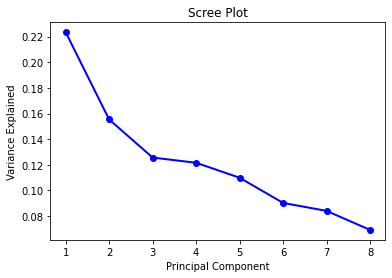

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca1.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(pca1.explained_variance_ratio_)

[0.22342624 0.15536212 0.1256732  0.12159419 0.10995552 0.09027313
 0.08407327 0.06922255]


Using PCA to compare algorithm outputs

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

results_pca = []
names_pca = []

modelsPCA = []
modelsPCA.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
modelsPCA.append(('LDA', LinearDiscriminantAnalysis()))
modelsPCA.append(('KNN', KNeighborsClassifier()))
modelsPCA.append(('CART', DecisionTreeClassifier()))
modelsPCA.append(('NB', GaussianNB()))
modelsPCA.append(('SVM', SVC(gamma='auto')))
modelsPCA.append(('XGB', XGBClassifier()))
modelsPCA.append(('RFC', RandomForestClassifier()))
    
#for classifier in classifiers:
for name, model in modelsPCA:
  pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=.95)), ('classifier', model)])
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(pipe, X_train_pca, y_train_pca, cv=kfold, scoring='accuracy')
  results_pca.append(cv_results)
  names_pca.append(name)
  print('%s: %f accuracy    (%f) std' % (name, cv_results.mean(), cv_results.std()))
  

LR: 0.967003 accuracy    (0.004335) std
LDA: 0.960403 accuracy    (0.007345) std
KNN: 0.968106 accuracy    (0.005675) std
CART: 0.946107 accuracy    (0.007095) std
NB: 0.925396 accuracy    (0.012008) std
SVM: 0.967737 accuracy    (0.000874) std
XGB: 0.968652 accuracy    (0.004677) std
RFC: 0.968470 accuracy    (0.001958) std


In [ ]:
# Listing recall by model instead of just accurcy above

for name, model in modelsPCA:
  pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=.95)), ('classifier', model)])
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(pipe, X_train_pca, y_train_pca, cv=kfold, scoring='recall')
  results_pca.append(cv_results)
  names_pca.append(name)
  print('%s: %f recall    (%f) std' % (name, cv_results.mean(), cv_results.std()))

LR: 0.159804 recall    (0.066821) std
LDA: 0.211111 recall    (0.064408) std
KNN: 0.206209 recall    (0.093323) std
CART: 0.278431 recall    (0.109062) std
NB: 0.165686 recall    (0.081123) std
SVM: 0.000000 recall    (0.000000) std
XGB: 0.135948 recall    (0.097473) std
RFC: 0.046405 recall    (0.068500) std


In [ ]:
for name, model in modelsPCA:
  pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=.95)), ('classifier', model)])
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(pipe, X_train_pca, y_train_pca, cv=kfold, scoring='f1')
  results_pca.append(cv_results)
  names_pca.append(name)
  print('%s: %f f1    (%f) std' % (name, cv_results.mean(), cv_results.std()))

LR: 0.235819 f1    (0.093347) std
LDA: 0.257455 f1    (0.075929) std
KNN: 0.291680 f1    (0.118590) std
CART: 0.242966 f1    (0.046150) std
NB: 0.125840 f1    (0.058724) std
SVM: 0.000000 f1    (0.000000) std
XGB: 0.212274 f1    (0.144670) std
RFC: 0.061738 f1    (0.066146) std


In [ ]:
for name, model in modelsPCA:
  pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=.95)), ('classifier', model)])
  pipe.fit(X_train_pca, y_train_pca)
  pred = pipe.predict(X_test_pca)
  print(confusion_matrix(y_test_pca, pred))
  print(classification_report(y_test_pca, pred))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier',
                 LogisticRegression(multi_class='ovr', solver='liblinear'))])

[[1312    8]
 [  36    8]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.50      0.18      0.27        44

    accuracy                           0.97      1364
   macro avg       0.74      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier', LinearDiscriminantAnalysis())])

[[1305   15]
 [  39    5]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.25      0.11      0.16        44

    accuracy                           0.96      1364
   macro avg       0.61      0.55      0.57      1364
weighted avg       0.95      0.96      0.95      1364



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier', KNeighborsClassifier())])

[[1315    5]
 [  36    8]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.62      0.18      0.28        44

    accuracy                           0.97      1364
   macro avg       0.79      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier', DecisionTreeClassifier())])

[[1283   37]
 [  35    9]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1320
           1       0.20      0.20      0.20        44

    accuracy                           0.95      1364
   macro avg       0.58      0.59      0.59      1364
weighted avg       0.95      0.95      0.95      1364



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier', GaussianNB())])

[[1252   68]
 [  34   10]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1320
           1       0.13      0.23      0.16        44

    accuracy                           0.93      1364
   macro avg       0.55      0.59      0.56      1364
weighted avg       0.95      0.93      0.94      1364



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier', SVC(gamma='auto'))])

[[1320    0]
 [  43    1]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       1.00      0.02      0.04        44

    accuracy                           0.97      1364
   macro avg       0.98      0.51      0.51      1364
weighted avg       0.97      0.97      0.95      1364



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier', XGBClassifier())])

[[1311    9]
 [  39    5]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.36      0.11      0.17        44

    accuracy                           0.96      1364
   macro avg       0.66      0.55      0.58      1364
weighted avg       0.95      0.96      0.96      1364



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('classifier', RandomForestClassifier())])

[[1316    4]
 [  41    3]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.43      0.07      0.12        44

    accuracy                           0.97      1364
   macro avg       0.70      0.53      0.55      1364
weighted avg       0.95      0.97      0.96      1364



# SMOTE plus PCA

In [ ]:
print("Before OverSampling count of Bankrupt: {}".format(sum(y_train_pca ==1)))
print("Before OverSampling count of not Bankrupt: {} \n".format(sum(y_train_pca ==0)))

Before OverSampling count of Bankrupt: 176
Before OverSampling count of not Bankrupt: 5279 



In [ ]:
import smote_variants as sv

# Instantiating the SMOTE class
oversampler= sv.SMOTE()

X_train_ov_pca, y_train_ov_pca = oversampler.sample(np.array(X_train_pca), np.array(y_train_pca))

# Shape after oversampling

print('After OverSampling, the shape of train_X: {}'.format(X_train_ov_pca.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ov_pca.shape))

print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_ov_pca==1)))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_ov_pca==0)))

2022-12-03 12:23:15,634:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2022-12-03 12:23:15,654:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-12-03 12:23:15,661:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-12-03 12:23:15,711:INFO:SMOTE: simplex sampl

After OverSampling, the shape of train_X: (10558, 93)
After OverSampling, the shape of train_y: (10558,) 

After OverSampling, counts of label 'Yes': 5279
After OverSampling, counts of label 'no': 5279


In [ ]:
for name, model in modelsPCA:
  pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=.95)), ('classifier', model)])
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(pipe, X_train_ov_pca, y_train_ov_pca, cv=kfold, scoring='accuracy')
  results_pca.append(cv_results)
  names_pca.append(name)
  print('%s: %f accuracy   (%f) std' % (name, cv_results.mean(), cv_results.std()))

LR: 0.903108 accuracy   (0.006697) std
LDA: 0.892689 accuracy   (0.007741) std
KNN: 0.946202 accuracy   (0.006862) std
CART: 0.948002 accuracy   (0.003728) std
NB: 0.537793 accuracy   (0.015311) std
SVM: 0.965524 accuracy   (0.004173) std
XGB: 0.947245 accuracy   (0.006609) std
RFC: 0.981342 accuracy   (0.003387) std


In [ ]:
for name, model in modelsPCA:
  pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=.95)), ('classifier', model)])
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(pipe, X_train_ov_pca, y_train_ov_pca, cv=kfold, scoring='precision')
  results_pca.append(cv_results)
  names_pca.append(name)
  print('%s: %f precision   (%f) std' % (name, cv_results.mean(), cv_results.std()))

LR: 0.891657 precision   (0.011890) std
LDA: 0.864594 precision   (0.011049) std
KNN: 0.903411 precision   (0.011263) std
CART: 0.931009 precision   (0.006201) std
NB: 0.521519 precision   (0.008947) std
SVM: 0.946517 precision   (0.008767) std
XGB: 0.924096 precision   (0.008536) std
RFC: 0.966905 precision   (0.004902) std


In [ ]:
for name, model in modelsPCA:
  pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=.95)), ('classifier', model)])
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(pipe, X_train_ov_pca, y_train_ov_pca, cv=kfold, scoring='recall')
  results_pca.append(cv_results)
  names_pca.append(name)
  print('%s: %f recall   (%f) std' % (name, cv_results.mean(), cv_results.std()))

LR: 0.917977 recall   (0.007486) std
LDA: 0.931429 recall   (0.007829) std
KNN: 0.999431 recall   (0.000868) std
CART: 0.965525 recall   (0.004379) std
NB: 0.917976 recall   (0.012571) std
SVM: 0.986930 recall   (0.004970) std
XGB: 0.974617 recall   (0.007772) std
RFC: 0.995643 recall   (0.002942) std


In [ ]:
for name, model in modelsPCA:
  pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=.95)), ('classifier', model)])
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(pipe, X_train_ov_pca, y_train_ov_pca, cv=kfold, scoring='f1')
  results_pca.append(cv_results)
  names_pca.append(name)
  print('%s: %f f1   (%f) std' % (name, cv_results.mean(), cv_results.std()))

LR: 0.904554 f1   (0.006077) std
LDA: 0.896716 f1   (0.007029) std
KNN: 0.948961 f1   (0.006189) std
CART: 0.947756 f1   (0.004843) std
NB: 0.665137 f1   (0.010142) std
SVM: 0.966263 f1   (0.003947) std
XGB: 0.948656 f1   (0.006377) std
RFC: 0.980948 f1   (0.003512) std
